# Diabetes Risk Prediction:
we dealt with the original data set ( https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system?select=2015.csv ) that was containing 330 features, and we chose 22 risk factors related to diabetes according to notebook (https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook)

#Import Libraries


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from collections import Counter
from scipy import stats
from math import log2, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **PART 1:** Load the original data set 


In [ ]:
col_list = ['DIABETE3','_RFHYPE5','TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', 
 '_RFDRHV5', 'HLTHPLN1', 'MEDCOST','GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK','SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]


In [ ]:
db_all = pd.read_csv("/content/2015.csv", usecols = col_list)

In [ ]:
pd.set_option('display.max_columns', 350)
db_all.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,MEDCOST,TOLDHI2,CVDSTRK3,DIABETE3,SEX,EDUCA,INCOME2,DIFFWALK,SMOKE100,_RFHYPE5,_CHOLCHK,_MICHD,_AGEG5YR,_BMI5,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,5.0,15.0,18.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,2.0,9.0,4018.0,1.0,2.0,1.0,2.0
1,3.0,88.0,88.0,2.0,1.0,2.0,2.0,3.0,2.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,7.0,2509.0,1.0,2.0,2.0,1.0
2,4.0,15.0,88.0,1.0,2.0,1.0,1.0,3.0,2.0,4.0,99.0,NaN,NaN,1.0,1.0,NaN,11.0,2204.0,9.0,9.0,9.0,9.0
3,5.0,30.0,30.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,8.0,1.0,2.0,2.0,1.0,2.0,9.0,2819.0,1.0,1.0,2.0,2.0
4,5.0,20.0,88.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,77.0,2.0,2.0,1.0,1.0,2.0,9.0,2437.0,1.0,9.0,1.0,2.0


In [ ]:
db_all.shape

(441456, 22)

# Cleaning 

In [ ]:
db_all.isna().sum()

GENHLTH         2
PHYSHLTH        1
MENTHLTH        0
HLTHPLN1        0
MEDCOST         1
TOLDHI2     59154
CVDSTRK3        0
DIABETE3        7
SEX             0
EDUCA           0
INCOME2      3301
DIFFWALK    12334
SMOKE100    14255
_RFHYPE5        0
_CHOLCHK        0
_MICHD       3942
_AGEG5YR        0
_BMI5       36398
_RFDRHV5        0
_FRTLT1         0
_VEGLT1         0
_TOTINDA        0
dtype: int64

In [ ]:
db_all = db_all.dropna()
db_all.shape

(343606, 22)

In [ ]:
db_all['_RFHYPE5'].value_counts()

1.0    191600
2.0    151300
9.0       706
Name: _RFHYPE5, dtype: int64

#Modify the values

In [ ]:
# DIABETE3
db_all['DIABETE3'] = db_all['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
db_all = db_all[db_all.DIABETE3 != 7]
db_all = db_all[db_all.DIABETE3 != 9]
db_all.DIABETE3.unique()

array([0., 2., 1.])

In [ ]:
# 1 _RFHYPE5
db_all['_RFHYPE5'] = db_all['_RFHYPE5'].replace({1:0, 2:1})
db_all = db_all[db_all._RFHYPE5 != 9]
db_all._RFHYPE5.unique()

array([1., 0.])

In [ ]:
#2 TOLDHI2
db_all['TOLDHI2'] = db_all['TOLDHI2'].replace({2:0})
db_all = db_all[db_all.TOLDHI2 != 7]
db_all = db_all[db_all.TOLDHI2 != 9]
db_all.TOLDHI2.unique()

array([1., 0.])

In [ ]:
#3 _CHOLCHK
db_all['_CHOLCHK'] = db_all['_CHOLCHK'].replace({3:0,2:0})
db_all = db_all[db_all._CHOLCHK != 9]
db_all._CHOLCHK.unique()

array([1., 0.])

In [ ]:
# 4 _BMI5
db_all['_BMI5'] = db_all['_BMI5'].div(100).round(0)
db_all._BMI5.unique()


array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [ ]:
# 5 SMOKE100
db_all['SMOKE100'] = db_all['SMOKE100'].replace({2:0})
db_all = db_all[db_all.SMOKE100 != 7]
db_all = db_all[db_all.SMOKE100 != 9]
db_all.SMOKE100.unique()

array([1., 0.])

In [ ]:
# 6 CVDSTRK3
db_all['CVDSTRK3'] = db_all['CVDSTRK3'].replace({2:0})
db_all = db_all[db_all.CVDSTRK3 != 7]
db_all = db_all[db_all.CVDSTRK3 != 9]
db_all.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
# 7 _MICHD
db_all['_MICHD'] = db_all['_MICHD'].replace({2: 0})
db_all._MICHD.unique()

array([0., 1.])

In [ ]:
# 8 _TOTINDA
db_all['_TOTINDA'] = db_all['_TOTINDA'].replace({2:0})
db_all = db_all[db_all._TOTINDA != 9]
db_all._TOTINDA.unique()

array([0., 1.])

In [ ]:
# 9 _FRTLT1
db_all['_FRTLT1'] = db_all['_FRTLT1'].replace({2:0})
db_all = db_all[db_all._FRTLT1 != 9]
db_all._FRTLT1.unique()

array([0., 1.])

In [ ]:
# 10 _VEGLT1
db_all['_VEGLT1'] = db_all['_VEGLT1'].replace({2:0})
db_all = db_all[db_all._VEGLT1 != 9]
db_all._VEGLT1.unique()

array([1., 0.])

In [ ]:
# 11 _RFDRHV5
db_all['_RFDRHV5'] = db_all['_RFDRHV5'].replace({1:0, 2:1})
db_all = db_all[db_all._RFDRHV5 != 9]
db_all._RFDRHV5.unique()

array([0., 1.])

In [ ]:
# 12 HLTHPLN1
db_all['HLTHPLN1'] = db_all['HLTHPLN1'].replace({2:0})
db_all = db_all[db_all.HLTHPLN1 != 7]
db_all = db_all[db_all.HLTHPLN1 != 9]
db_all.HLTHPLN1.unique()

array([1., 0.])

In [ ]:
# 13 MEDCOST
db_all['MEDCOST'] = db_all['MEDCOST'].replace({2:0})
db_all = db_all[db_all.MEDCOST != 7]
db_all = db_all[db_all.MEDCOST != 9]
db_all.MEDCOST.unique()

array([0., 1.])

In [ ]:
# 14 GENHLTH
db_all = db_all[db_all.GENHLTH != 7]
db_all = db_all[db_all.GENHLTH != 9]
db_all.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [ ]:
# 15 MENTHLTH
db_all['MENTHLTH'] = db_all['MENTHLTH'].replace({88:0})
db_all = db_all[db_all.MENTHLTH != 77]
db_all = db_all[db_all.MENTHLTH != 99]
db_all.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [ ]:
# 16 PHYSHLTH
db_all['PHYSHLTH'] = db_all['PHYSHLTH'].replace({88:0})
db_all = db_all[db_all.PHYSHLTH != 77]
db_all = db_all[db_all.PHYSHLTH != 99]
db_all.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [ ]:
# 17 DIFFWALK
db_all['DIFFWALK'] = db_all['DIFFWALK'].replace({2:0})
db_all = db_all[db_all.DIFFWALK != 7]
db_all = db_all[db_all.DIFFWALK != 9]
db_all.DIFFWALK.unique()

array([1., 0.])

In [ ]:
# 18 SEX
db_all['SEX'] = db_all['SEX'].replace({2:0})
db_all.SEX.unique()

array([0., 1.])

In [ ]:
# 19 _AGEG5YR
db_all = db_all[db_all._AGEG5YR != 14]
db_all._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
# 20 EDUCA
db_all = db_all[db_all.EDUCA != 9]
db_all.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [ ]:
# 21 INCOME2
db_all = db_all[db_all.INCOME2 != 77]
db_all = db_all[db_all.INCOME2 != 99]
db_all.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [ ]:
db_all.shape

(253680, 22)

#Rename the Data

In [ ]:
db_mod = db_all.rename(columns = {'DIABETE3':'Diabetes', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income'})
                                  

In [ ]:
db_mod.shape

(253680, 22)

In [ ]:
print(db_mod.duplicated().sum())
db_mod.drop_duplicates(inplace=True)
print(db_mod.duplicated().sum())

23899
0


In [ ]:
# Combining prediabetic with diabetic
db_mod["Diabetes"].replace({2 : 1 },inplace=True)
db_mod.head()

,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
0,5.0,15.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,1.0,1.0,0.0,9.0,40.0,0.0,0.0,1.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,25.0,0.0,0.0,0.0,1.0
3,5.0,30.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,8.0,1.0,0.0,1.0,1.0,0.0,9.0,28.0,0.0,1.0,0.0,0.0
5,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,11.0,27.0,0.0,1.0,1.0,1.0
6,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,11.0,24.0,0.0,1.0,1.0,1.0


# Comment
The dependent variable (Diabetes) had 3 values: 0 representing non-diabetic, 1 representing prediabetic, and 2 representing diabetic. The number of people that reported having prediabetes is very small in comparison with the rest. We can handle this by either dropping the rows with value 1 or combining them with one of the other classes. Since we are interested in predicting the risk of having diabetes, and according to [1] prediabetes means having a higher risk of having diabetes, we will combine the prediabetic with the diabetic 

In [ ]:
db_mod.to_csv('diabetes_ours.csv', sep=",", index=False)

# **PART 2**: Load Data
We run part 1 for one time only, then we are using the saved data to load it more quick since loading the original data set take a considerable amount of time.

In [ ]:
db = pd.read_csv("/content/diabetes_ours.csv")
db.head()

,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
0,5.0,15.0,18.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,1.0,1.0,0.0,9.0,40.0,0.0,0.0,1.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,25.0,0.0,0.0,0.0,1.0
2,5.0,30.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,8.0,1.0,0.0,1.0,1.0,0.0,9.0,28.0,0.0,1.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,11.0,27.0,0.0,1.0,1.0,1.0
4,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,11.0,24.0,0.0,1.0,1.0,1.0


# Exploring Data


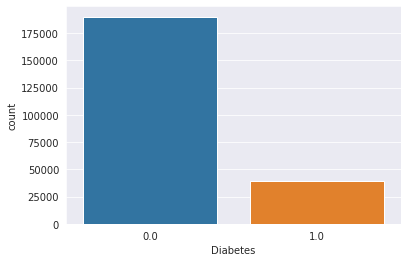

In [ ]:
## Is the dataset balanced?
db['Diabetes'].value_counts()
sns.countplot(x='Diabetes',data = db)

Comment: The data set is imbalnced, but we will deal with this challenge in the other notebook of Model Selection and Evaluation.

# **PART 3**: Feature analysis:

We have implemented some of the graphs to visualize the features and explore the relation between them and the target variable.



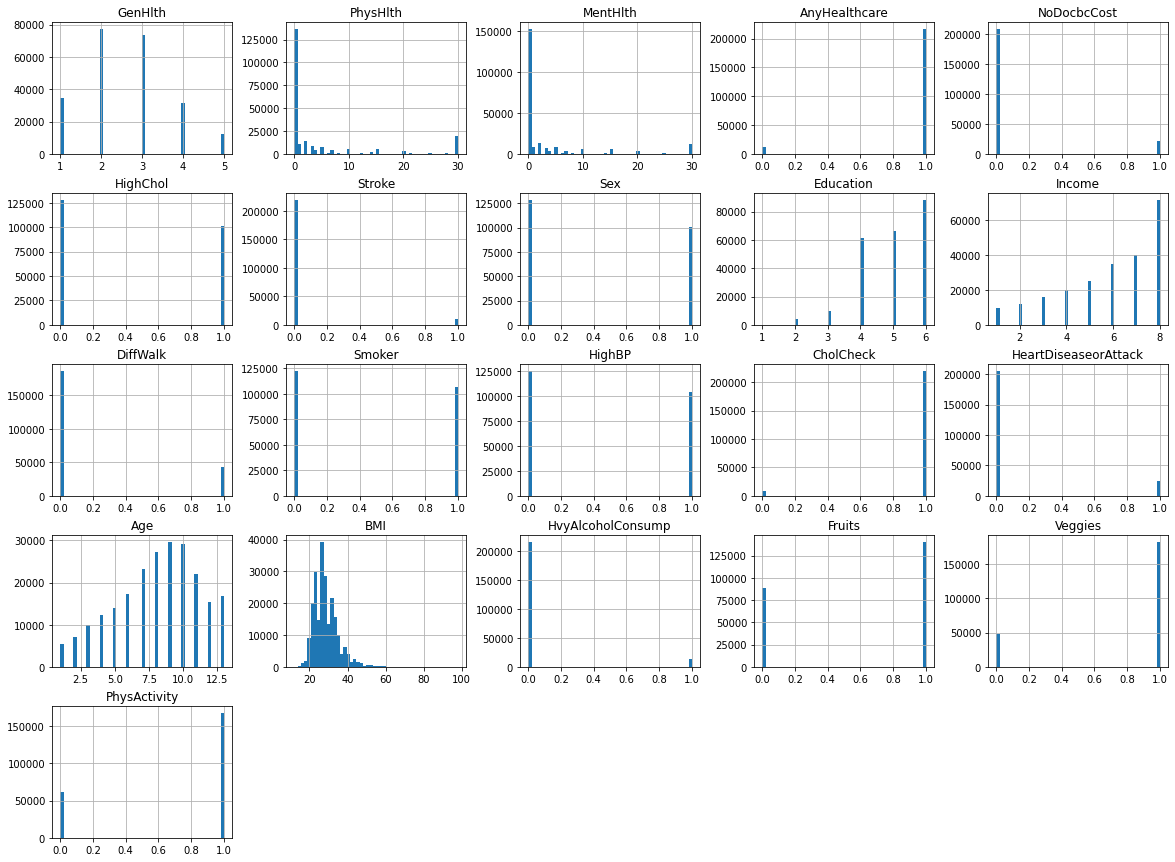

In [ ]:
independent_var = db.drop(columns = 'Diabetes')
independent_var.hist(bins=50, figsize=(20,15))
plt.show()

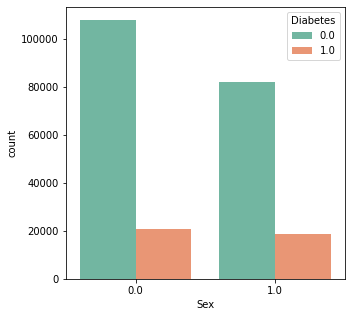

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Sex', hue = 'Diabetes', data = db, palette = 'Set2')
plt.show()

Comment: From the above graph, the ratio between the men who have diabetes to those who don't is higher than the ratio between the women who have diabetes to those who don't. According to the data set, men are at higher risk of getting diabetes than women.

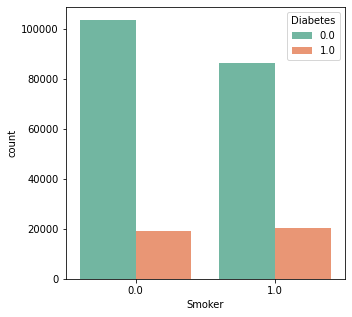

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Smoker', hue = 'Diabetes', data = db, palette = 'Set2')
plt.show()

Comment: From the above graph, smoking is not related to the diabetes disease, same range of affected people in both smokers and non smokers.


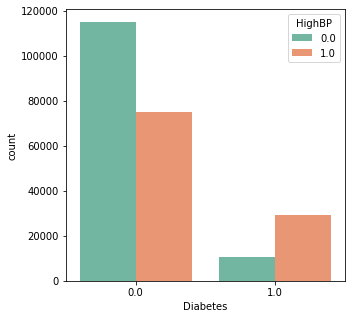

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Diabetes', hue = 'HighBP', data = db, palette = 'Set2')
plt.show()

Comment: Having a high blood pressure is positively correlated with the risk of having diabetes.

In [ ]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=1,subplot_titles = ('Percentages'),specs=[[{'type':'domain'}]])

fig.add_trace((go.Pie(labels = db['Age'].value_counts().keys(),values = db['Age'].value_counts().values,textfont = dict(size = 12),
                     hole = .5, marker=dict(colors=colors),textinfo = 'label+percent',hoverinfo = 'label')), row = 1, col = 1)

fig.update_yaxes(range=[0,40000])
fig.update_xaxes(range=[0,15])

fig.update_layout ( title=dict(text = "Age Distribution",x=0.5,y=0.95),title_font_size=30,width = 400,height = 400)
iplot(fig)

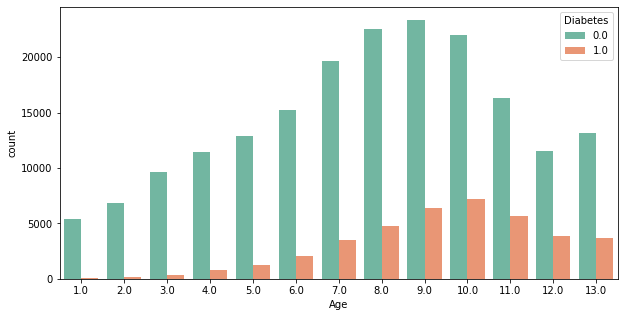

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Age', hue = 'Diabetes', data = db, palette = 'Set2')
plt.show()

Comment:
The risk of diabetes is at its peak for those who are of age above 65 years old, as level 10 corresponds to Age 65 to 69.

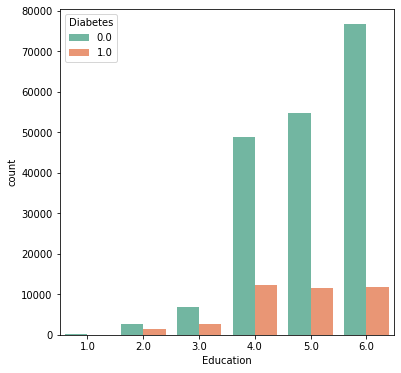

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Education', hue = 'Diabetes', data = db, palette = 'Set2')
plt.show()

Comment: As it can be seen from the count plot above, the ratio of diabetic to non-diabetic decreases as the level of Education increases. The data set shows that people with higher education level are at a lower risk of having diabetes.

# Correlation:

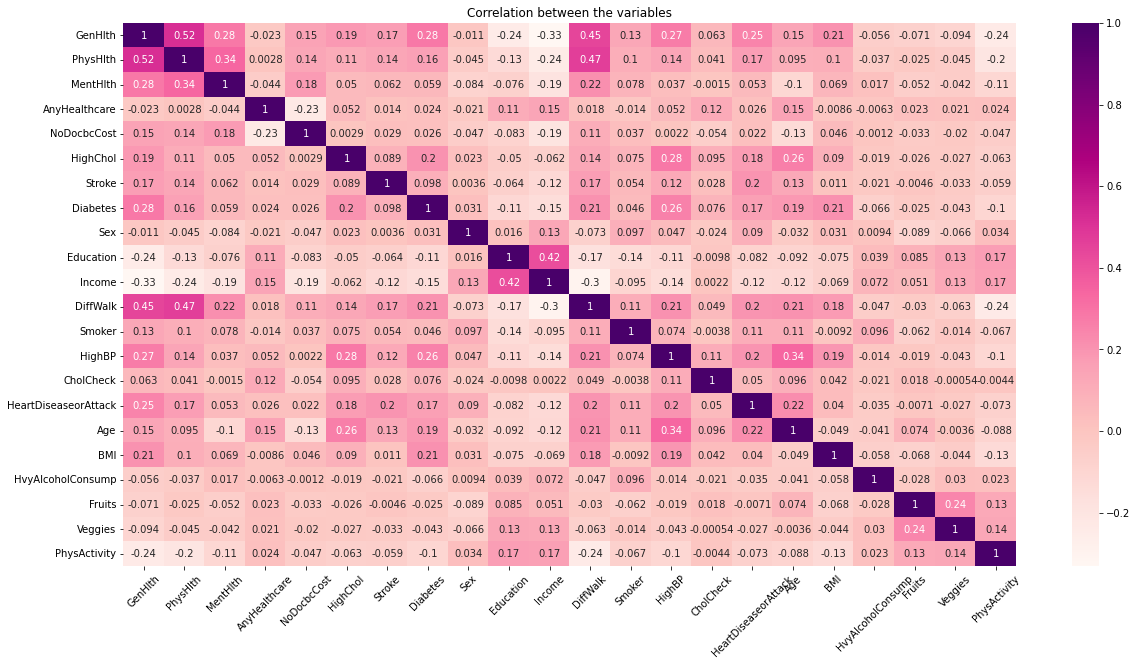

In [ ]:
# heatmap for different features
fig, ax = plt.subplots(figsize=(20,10))         
sns.heatmap(db.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [ ]:
correlation = db.corr()
correlation['Diabetes']
correlation["Diabetes"].sort_values(ascending=False)

Diabetes                1.000000
GenHlth                 0.282328
HighBP                  0.260346
BMI                     0.211155
DiffWalk                0.208126
HighChol                0.204418
Age                     0.185479
HeartDiseaseorAttack    0.167184
PhysHlth                0.158697
Stroke                  0.097685
CholCheck               0.076190
MentHlth                0.058826
Smoker                  0.046262
Sex                     0.030797
NoDocbcCost             0.025940
AnyHealthcare           0.023756
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
PhysActivity           -0.102391
Education              -0.108504
Income                 -0.147809
Name: Diabetes, dtype: float64

Comment: The correlation coeffiecients and the heat map above show how each risk factors affects the target variable. We will start by constructing a model that takes all the independent variables as input and then later we will select the most importnat features  and use them only to train the model.

# Check relations between differnet variables

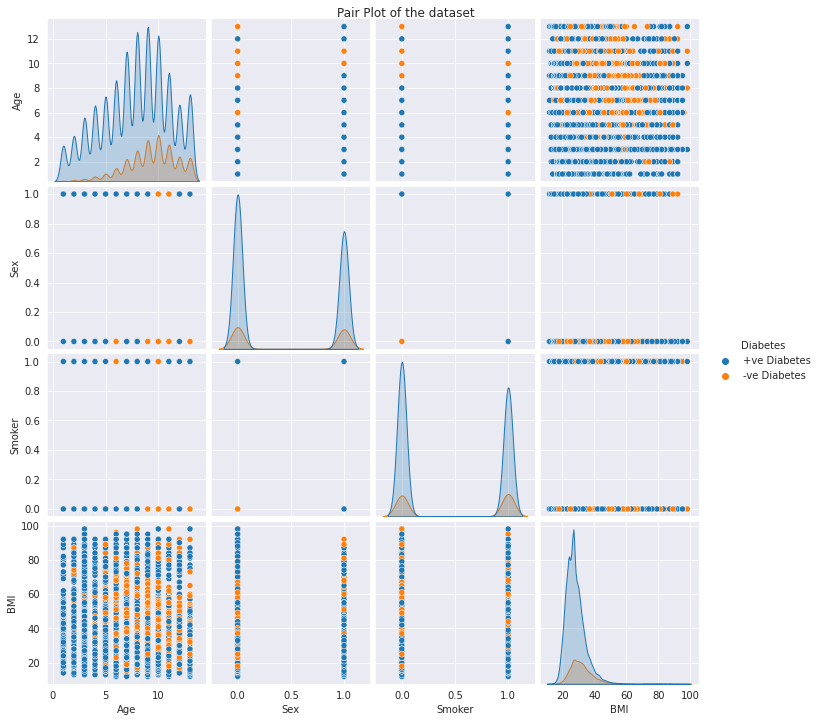

In [ ]:
# view the relationships between variables; color code by species type
sns.set_style('darkgrid')
di = {0: '+ve Diabetes', 1: '-ve Diabetes'}
cols = ['Diabetes', 'Age', 'Sex', 'Smoker', 'BMI']
pplot = sns.pairplot(db[cols].replace({"Diabetes": di}), hue='Diabetes')
pplot.fig.suptitle("Pair Plot of the dataset", y=1);

Comment: The Pair plot above shows the relationship between some features such as : BMI, Smoker , Sex and Age with the Diabetes feature. With values 0--> +ve Diabetes & 1--> -ve Diabetes.

Refrences:

[1] https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset-notebook
